In [97]:
from fcmpy import ExpertFcm, FcmSimulator, FcmIntervention
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
fcm = ExpertFcm()

In [42]:
fcm.linguistic_terms = {
                        '-VH': [-1, -1, -0.75],
                        '-H': [-1, -0.75, -0.50],
                        '-M': [-0.75, -0.5, -0.25], 
                        '-L': [-0.5, -0.25, 0],
                        '-VL': [-0.25, 0, 0],
                        'NA': [-0.001, 0, 0.001],
                        '+VL': [0, 0, 0.25],
                        '+L': [0, 0.25, 0.50],
                        '+M': [0.25, 0.5, 0.75],
                        '+H': [0.5, 0.75, 1],
                        '+VH': [0.75, 1, 1]
                        }

fcm.universe = np.arange(-1, 1.05, .05)

fcm.fuzzy_membership = fcm.automf(method='trimf')

In [104]:
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


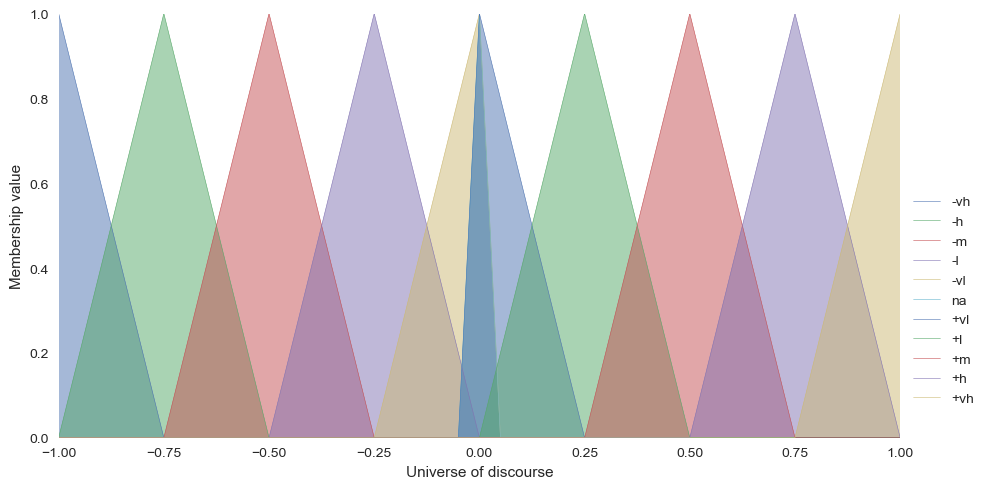

In [131]:
plt.style.use('seaborn-v0_8')

mfs = fcm.fuzzy_membership

fig = plt.figure(figsize= (10, 5))
axes = plt.axes()

for i in mfs:
    axes.plot(fcm.universe, mfs[i], linewidth=0.4, label=str(i))
    axes.fill_between(fcm.universe, mfs[i], alpha=0.5)

axes.legend(bbox_to_anchor=(1., 0.6))

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()
plt.margins(x=0, y=0)
axes.grid(False)
axes.set_facecolor('white')

plt.ylabel("Membership value")
plt.xlabel("Universe of discourse")
plt.tight_layout()
plt.savefig('trapmf.svg')


In [67]:
fcm.fuzzy_membership

{'-vh': array([1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ]),
 '-h': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ]),
 '-m': array([0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6,
        0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ]),
 '-l': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4,
        0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ]),
 '-vl': array([0. ,

In [65]:
act_pvh = fcm.fuzzy_implication(mfs['+vh'], weight= 0.33, method ='Mamdani')
act_pm = fcm.fuzzy_implication(mfs['+m'], weight=0.16, method ='Mamdani')
act_ph = fcm.fuzzy_implication(mfs['+h'], weight=0.5, method ='Mamdani')

In [66]:
act_pvh

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0.6,
       0.8, 0.9])

In [59]:
activatedMamdani = {'+vh' : act_pvh, '+h' : act_ph, '+m' : act_pm}

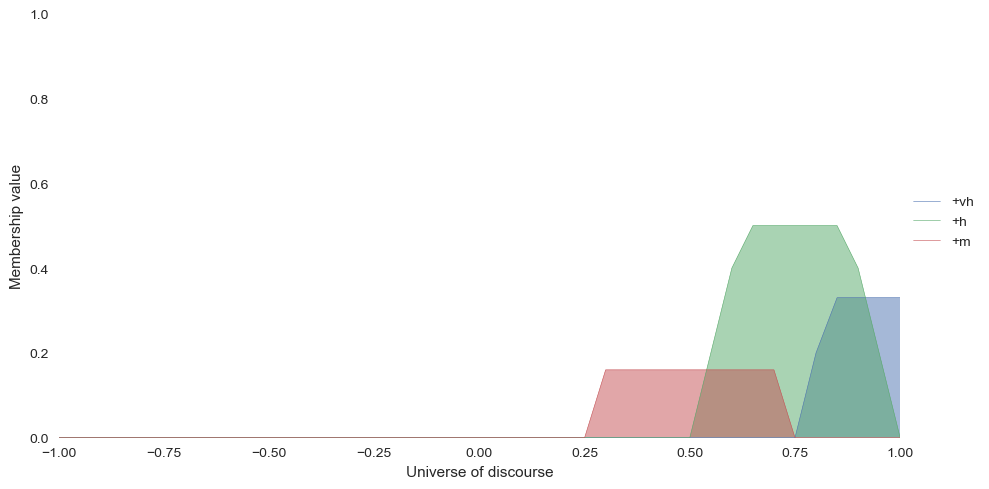

In [141]:
fig = plt.figure(figsize= (10, 5))
axes = plt.axes()

for i in activatedMamdani:
    axes.plot(fcm.universe, activatedMamdani[i], linewidth=0.4, label=str(i))
    axes.fill_between(fcm.universe, activatedMamdani[i], alpha=0.5)


axes.legend(bbox_to_anchor=(1, 0.6))

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()
axes.grid(False)
axes.set_facecolor('white')
axes.set_ylim([0,1])

plt.margins(x=0, y=0)
plt.ylabel("Membership value")
plt.xlabel("Universe of discourse")
plt.tight_layout()
plt.savefig('mamdani.svg')


In [60]:
import functools
aggregated = functools.reduce(lambda x,y: fcm.aggregate(x=x, y=y, method='fMax'), 
                              [activatedMamdani[i] for i in activatedMamdani.keys()])

In [73]:
aggregated

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.16, 0.16, 0.16, 0.16, 0.16, 0.2 , 0.4 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.4 , 0.33, 0.33])

In [75]:
dfuz = fcm.defuzz(x=fcm.universe, mfx=aggregated, method='centroid') #uses skfuzzy 

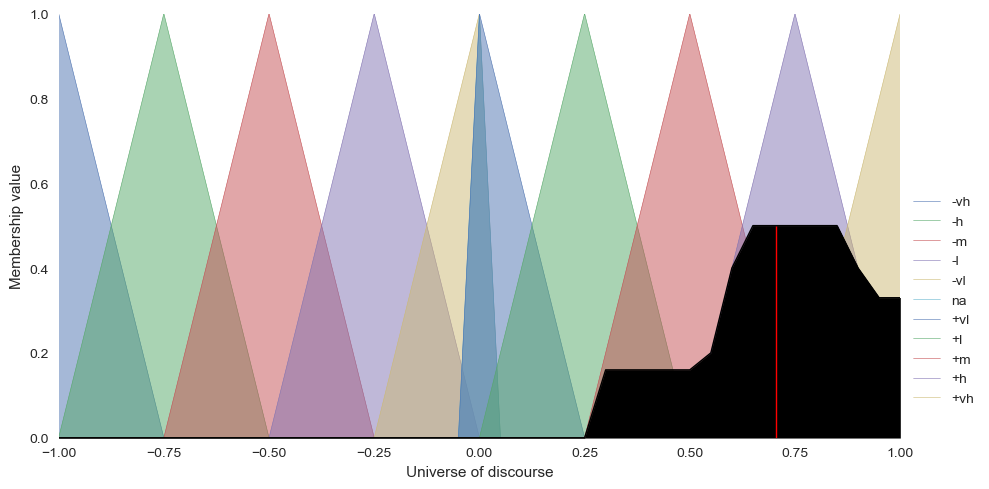

In [143]:
mfs = fcm.fuzzy_membership

fig = plt.figure(figsize= (10, 5))
axes = plt.axes()

for i in mfs:
    axes.plot(fcm.universe, mfs[i], linewidth=0.4, label=str(i), zorder=1)
    axes.fill_between(fcm.universe, mfs[i], alpha=0.5)

axes.plot(fcm.universe, aggregated, linewidth=1, color='black', zorder=2)
axes.fill_between(fcm.universe, aggregated, color='black')

axes.vlines(x=dfuz, ymin=0, ymax=0.5, linewidth=1, color='r')

axes.legend(bbox_to_anchor=(1, 0.6))

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.get_xaxis().tick_bottom()
axes.get_yaxis().tick_left()
plt.margins(x=0, y=0)
axes.grid(False)
axes.set_facecolor('white')

plt.ylabel("Membership value")
plt.xlabel("Universe of discourse")
plt.tight_layout()
plt.savefig('defuzz.svg')


0.7050573514077162